<a href="https://colab.research.google.com/github/ravisiv/PhishingEmailDetection/blob/main/BERT_Example3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BERT EXAMPLE 3

In [22]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.layers import Input
from tensorflow import constant,string
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

<h4>Import the dataset (Dataset is taken from kaggle)</h4>

In [23]:
import pandas as pd

df = pd.read_csv("/content/BERT_SPAM_Example.csv")
df.head(5)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<h4>Split it into training and test data set</h4>

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['label'], stratify=df['label'])

In [25]:
X_train.head(10)

911                               I am sorry it hurt you.
1632    Hello my little party animal! I just thought I...
3284    They are just making it easy to pay back. I ha...
3235    Aight text me when you're back at mu and I'll ...
5546           Ic. There are a lotta childporn cars then.
4467                           Much better now thanks lol
507     You should know now. So how's anthony. Are you...
3067               Boy you best get yo ass out here quick
3159                     How much did ur hdd casing cost.
2374                             Dunno lei he neva say...
Name: text, dtype: object

<h4>import BERT model </h4>

In [26]:
preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",trainable=False)

<h4>Build Model</h4>

There are two types of models you can build in tensorflow. 

(1) Sequential
(2) Functional

More information on these two is here: https://becominghuman.ai/sequential-vs-functional-model-in-keras-20684f766057

In [27]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = preprocess(text_input)
outputs = encoder(preprocessed_text)
es = EarlyStopping(patience=2)
pooled_output = outputs["pooled_output"] # [batch_size, 768].

# Neural network layers
layer1 = tf.keras.layers.Dropout(0.01, name="dropout")(pooled_output)
layer2= tf.keras.layers.Dense(512, activation='relu')(pooled_output)
layer3 = tf.keras.layers.Dense(128, activation='relu')(pooled_output)
layer4 = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(layer3)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [layer4])


https://stackoverflow.com/questions/47605558/importerror-failed-to-import-pydot-you-must-install-pydot-and-graphviz-for-py

In [28]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [29]:
len(X_train)

4179

In [30]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

adam = Adam(lr=0.0001)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<h4>Train the model</h4>

In [31]:
model.fit(X_train, y_train, epochs=10, batch_size=128, callbacks=[es])

Epoch 1/10
33/33 [==============================] - ETA: 0s - loss: 0.3816 - accuracy: 0.8476 - precision: 0.2450 - recall: 0.0661WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


33/33 [==============================] - 61s 2s/step - loss: 0.3816 - accuracy: 0.8476 - precision: 0.2450 - recall: 0.0661
Epoch 2/10
33/33 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9062 - precision: 0.8158 - recall: 0.3875WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


33/33 [==============================] - 53s 2s/step - loss: 0.2077 - accuracy: 0.9062 - precision: 0.8158 - recall: 0.3875
Epoch 3/10
33/33 [==============================] - ETA: 0s - loss: 0.1555 - accuracy: 0.9419 - precision: 0.8712 - recall: 0.6643WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


33/33 [==============================] - 53s 2s/step - loss: 0.1555 - accuracy: 0.9419 - precision: 0.8712 - recall: 0.6643
Epoch 4/10
33/33 [==============================] - ETA: 0s - loss: 0.1252 - accuracy: 0.9584 - precision: 0.9004 - recall: 0.7750WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


33/33 [==============================] - 53s 2s/step - loss: 0.1252 - accuracy: 0.9584 - precision: 0.9004 - recall: 0.7750
Epoch 5/10
33/33 [==============================] - ETA: 0s - loss: 0.1043 - accuracy: 0.9682 - precision: 0.9178 - recall: 0.8375WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


33/33 [==============================] - 53s 2s/step - loss: 0.1043 - accuracy: 0.9682 - precision: 0.9178 - recall: 0.8375
Epoch 6/10
33/33 [==============================] - ETA: 0s - loss: 0.0926 - accuracy: 0.9706 - precision: 0.9379 - recall: 0.8357WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


33/33 [==============================] - 53s 2s/step - loss: 0.0926 - accuracy: 0.9706 - precision: 0.9379 - recall: 0.8357
Epoch 7/10
33/33 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9775 - precision: 0.9623 - recall: 0.8661WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


33/33 [==============================] - 53s 2s/step - loss: 0.0786 - accuracy: 0.9775 - precision: 0.9623 - recall: 0.8661
Epoch 8/10
33/33 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.9797 - precision: 0.9594 - recall: 0.8857WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


33/33 [==============================] - 53s 2s/step - loss: 0.0722 - accuracy: 0.9797 - precision: 0.9594 - recall: 0.8857
Epoch 9/10
33/33 [==============================] - ETA: 0s - loss: 0.0662 - accuracy: 0.9811 - precision: 0.9581 - recall: 0.8982WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


33/33 [==============================] - 53s 2s/step - loss: 0.0662 - accuracy: 0.9811 - precision: 0.9581 - recall: 0.8982
Epoch 10/10
33/33 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9813 - precision: 0.9547 - recall: 0.9036WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,precision,recall


33/33 [==============================] - 53s 2s/step - loss: 0.0632 - accuracy: 0.9813 - precision: 0.9547 - recall: 0.9036


In [32]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 15s 327ms/step - loss: 0.0885 - accuracy: 0.9770 - precision: 0.9016 - recall: 0.9305


[0.08851691335439682,
 0.9770280122756958,
 0.9015544056892395,
 0.9304812550544739]

In [33]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [34]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[1187,   19],
       [  13,  174]])

Text(33.0, 0.5, 'Truth')

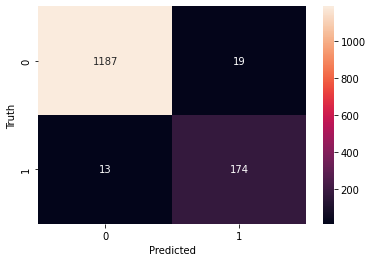

In [36]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1206
           1       0.90      0.93      0.92       187

    accuracy                           0.98      1393
   macro avg       0.95      0.96      0.95      1393
weighted avg       0.98      0.98      0.98      1393



<h4>Inference</h4>

In [38]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

array([[0.840798  ],
       [0.9772231 ],
       [0.6738614 ],
       [0.02530849],
       [0.0048115 ]], dtype=float32)